<a href="https://colab.research.google.com/github/smlra-kjsce/Cyber-ML-DL-101/blob/master/Preprocessing_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import h5py
import numpy as np
filepath = 'http.mat'
arrays = {}
f = h5py.File(filepath)
for k, v in f.items():
    arrays[k] = np.array(v)

In [0]:
import pandas as pd
import numpy as np
x = np.array(arrays['X']).T
y = np.array(arrays['y']).T

In [0]:
print(x.shape)
print(y.shape)

(567498, 3)
(567498, 1)


In [0]:
cols = ['duration','source bytes','destination bytes']

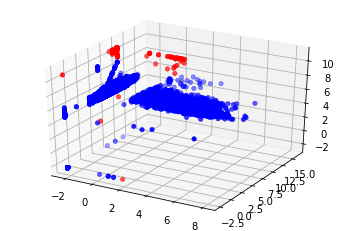

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
color = ['r' if i==1 else 'b' for i in y]
ax = plt.axes(projection='3d')
ax.scatter(x.T[0], x.T[2], x.T[1], c=color, cmap='viridis', linewidth=0.5);

In [0]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(n_estimators=1000,bootstrap=True,verbose=True,n_jobs=10)
#from sklearn.neighbors import LocalOutlierFactor
#model = LocalOutlierFactor(n_neighbors=10)
#from sklearn.covariance import EllipticEnvelope
#model = EllipticEnvelope(support_fraction = 0.5)
model.fit(x[[i.item() for i in y!=1]])

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:   14.4s remaining:   57.7s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:   14.6s finished


IsolationForest(behaviour='old', bootstrap=True, contamination='legacy',
                max_features=1.0, max_samples='auto', n_estimators=1000,
                n_jobs=10, random_state=None, verbose=True, warm_start=False)

In [0]:
y_pred = model.predict(x)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


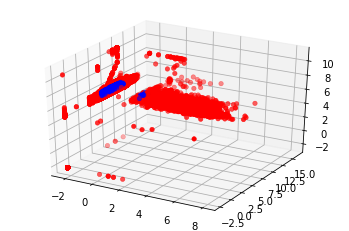

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
color = ['r' if i==-1 else 'b' for i in y_pred]
ax = plt.axes(projection='3d')
ax.scatter(x.T[0], x.T[2], x.T[1], c=color, cmap='viridis', linewidth=0.5);

In [0]:
sum(y[y_pred==-1])

array([2211.])

In [0]:
len(y_pred[y_pred==-1])

58738

In [0]:
1122/565000

0.001985840707964602

In [0]:
# make sure to enable GPU acceleration! == Done
device = 'cuda'

!pip3 install torch torchvision
!pip install torchviz

#Import Libraries


from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from math import pi

     |████████████████████████████████| 51kB 2.8MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3520 sha256=b7751dda2182450a9016eab6ebc492c4d6ba48f1e793e0b4f44b4a61f637a03d
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


In [0]:
#Import Libraries

from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from copy import deepcopy

In [0]:
args={}
kwargs={}
args['batch_size']=1000
args['test_batch_size']=1000
args['epochs']=1000  #The number of Epochs is the number of times you go through the full dataset. 
args['lr']=0.25 #Learning rate is how fast it will decend. 
args['momentum']=0.05 #SGD momentum (default: 0.5) Momentum is a moving average of our gradients (helps to keep direction).

args['seed']=1 #random seed
args['log_interval']=10
args['cuda']=False

In [0]:
class Net(nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3, 10)
        self.fc2 = nn.Linear(10, 2)
        self.fc3 = nn.Linear(2, 10)
        self.fc4 = nn.Linear(10, 3)

    def forward(self, x):
        self.x = x
        #Fully Connected Layer/Activation
        self.after_fc1 = self.fc1(self.x)
        self.after_relu1 = F.relu(self.after_fc1)
        #Fully Connected Layer/Activation
        self.after_fc2 = self.fc2(self.after_relu1)
        self.after_relu2 = F.relu(self.after_fc2)
        #Fully Connected Layer/Activation
        self.after_fc3 = self.fc3(self.after_relu2)
        self.after_relu3 = F.relu(self.after_fc3)
        #Fully Connected Layer/Activation
        self.after_fc4 = self.fc4(self.after_relu3)
        return self.after_fc4

In [0]:
xx = x[[i.item() for i in y==0]]
x_norm = (xx-xx.mean(axis=0))/xx.std(axis=0)
print(x_norm)

[[-0.07286518 -0.59321804  2.45671336]
 [-0.07286518 -1.60523737  0.7103262 ]
 [-0.07286518 -0.25997131 -0.28127359]
 ...
 [-0.07286518 -0.54366828  0.5381482 ]
 [-0.07286518 -0.52730304 -0.27756985]
 [-0.07286518 -0.52730304 -0.36630123]]


In [0]:
losses = []
output = []
def train(epoch):
    global x_norm
    model.train()
    #Variables in Pytorch are differenciable. 
    x_norm = Variable(torch.Tensor(x_norm))
    #This will zero out the gradients for this batch. 
    optimizer.zero_grad()
    output = model(x_norm)
    # print(output)
    # Calculate the loss The negative log likelihood loss. It is useful to train a classification problem with C classes.
    #print(output[0])
    loss = torch.mean(torch.sum((x_norm-output)**2,axis=1))
    # print(loss)
    #dloss/dx for every Variable 
    loss.backward()
    losses.append(loss.item())
    #to do a one-step update on our parameter.
    optimizer.step()
    #Print out the loss periodically. 
    print('Train Epoch:',epoch,'Loss:',loss)
    if epoch%50==0:
      args['lr'] = args['lr']/1.5
  
model = Net()

optimizer = optim.SGD(model.parameters(), lr=args['lr'], momentum=args['momentum'])

for epoch in range(1, args['epochs'] + 1):
    train(epoch)
    if losses[-1]<0.2:
      break

Train Epoch: 1 Loss: tensor(3.1037, grad_fn=<MeanBackward0>)
Train Epoch: 2 Loss: tensor(3.0382, grad_fn=<MeanBackward0>)
Train Epoch: 3 Loss: tensor(3.0130, grad_fn=<MeanBackward0>)
Train Epoch: 4 Loss: tensor(3.0038, grad_fn=<MeanBackward0>)
Train Epoch: 5 Loss: tensor(2.9991, grad_fn=<MeanBackward0>)
Train Epoch: 6 Loss: tensor(2.9955, grad_fn=<MeanBackward0>)
Train Epoch: 7 Loss: tensor(2.9924, grad_fn=<MeanBackward0>)
Train Epoch: 8 Loss: tensor(2.9893, grad_fn=<MeanBackward0>)
Train Epoch: 9 Loss: tensor(2.9861, grad_fn=<MeanBackward0>)
Train Epoch: 10 Loss: tensor(2.9824, grad_fn=<MeanBackward0>)
Train Epoch: 11 Loss: tensor(2.9781, grad_fn=<MeanBackward0>)
Train Epoch: 12 Loss: tensor(2.9730, grad_fn=<MeanBackward0>)
Train Epoch: 13 Loss: tensor(2.9667, grad_fn=<MeanBackward0>)
Train Epoch: 14 Loss: tensor(2.9591, grad_fn=<MeanBackward0>)
Train Epoch: 15 Loss: tensor(2.9496, grad_fn=<MeanBackward0>)
Train Epoch: 16 Loss: tensor(2.9376, grad_fn=<MeanBackward0>)
Train Epoch: 17 L

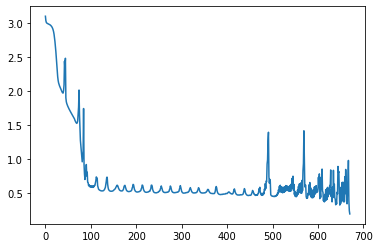

In [0]:
plt.plot(losses)

In [0]:
x_norm[10]

tensor([-0.0729, -1.1500, -2.0232])

In [0]:
model(x_norm[10])

tensor([-0.5837, -1.2075, -1.6955], grad_fn=<AddBackward0>)

In [0]:
new_opt = model(x_norm).detach().numpy()

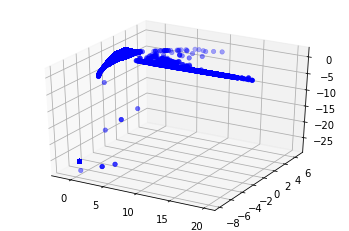

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
color = ['r' if i==1 else 'b' for i in y[y!=1]]
ax = plt.axes(projection='3d')
ax.scatter(new_opt.T[0], new_opt.T[2], new_opt.T[1], c=color, cmap='viridis', linewidth=0.5);

In [0]:
data_2d = model.after_fc2.detach().numpy()

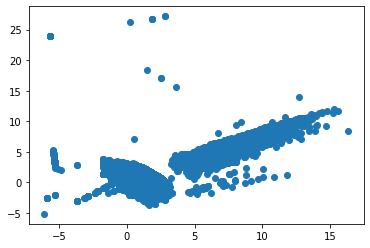

In [0]:
plt.scatter(data_2d.T[0],data_2d.T[1])

In [0]:
X_norm = (x-x.mean(axis=0))/x.std(axis=0)
print(X_norm)

[[-0.07316462 -0.42890431  2.45020962]
 [-0.07316462 -1.07921608  0.70527316]
 [-0.07316462 -0.21476386 -0.28550291]
 ...
 [-0.07316462 -0.39706421  0.53323819]
 [-0.07316462 -0.3865481  -0.28180225]
 [-0.07316462 -0.3865481  -0.37045992]]


In [0]:
opt = model(Variable(torch.tensor(X_norm, dtype=torch.float))).detach().numpy()

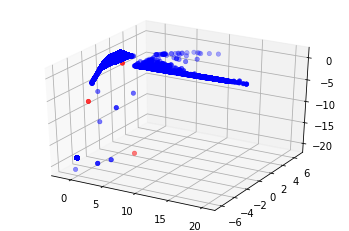

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
color = ['r' if i==1 else 'b' for i in y]
ax = plt.axes(projection='3d')
ax.scatter(opt.T[0], opt.T[2], opt.T[1], c=color, cmap='viridis', linewidth=0.5);

In [0]:
data_2d = model.after_fc2.detach().numpy()

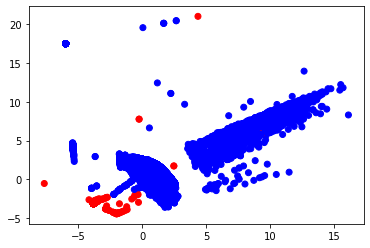

In [0]:
color = ['r' if i==1 else 'b' for i in y]
plt.scatter(data_2d.T[0],data_2d.T[1],c=color)